![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

print('Promedio de bicicletas rentadas por \n{0}:'.format(bikes.groupby('workingday').total.mean()))
print(bikes.groupby('workingday').total.describe().T)
print(bikes.total.describe().T)



Promedio de bicicletas rentadas por 
workingday
0    188.506621
1    193.011873
Name: total, dtype: float64:
workingday            0            1
count       3474.000000  7412.000000
mean         188.506621   193.011873
std          173.724015   184.513659
min            1.000000     1.000000
25%           44.000000    41.000000
50%          128.000000   151.000000
75%          304.000000   277.000000
max          783.000000   977.000000
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64


In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

print('Promedio de bicicletas rentadas por \n{0}:'.format(bikes.groupby('hour').total.mean()))
print(bikes.groupby('hour').total.describe().T)


Promedio de bicicletas rentadas por 
hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64:
hour           0           1           2           3           4           5   \
count  455.000000  454.000000  448.000000  433.000000  442.000000  452.000000   
mean    55.138462   33.859031   22.899554   11.757506    6.407240   19.767699   
std     43.620012   34.112105   26.110267   12.666442    4.217633   12.784293   
min      2.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     24.000000   11.000000    5.000000    3.000000    3.000000    8.000000   
50%     41.000000   19.000000   11.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

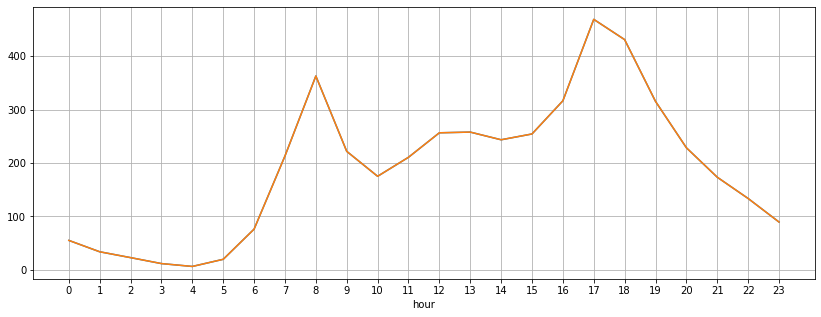

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"

bikes.groupby('hour').total.mean().plot(grid=True, xticks= range(0,24),  figsize=(14, 5))

<AxesSubplot:xlabel='hour'>

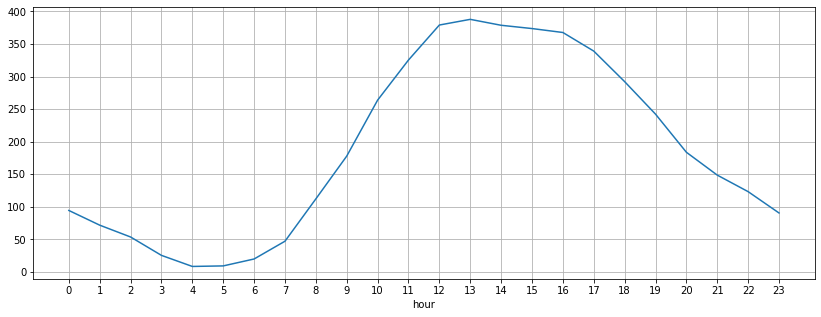

In [9]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday == 0].groupby('hour').total.mean().plot(grid=True,xticks= range(0,24),  figsize=(14, 5))


Se observan dos picos en la renta promedio de bicicletas durante el día, a las 8:00 y a las 18:00 horarios de entrada y salida de las oficinas

Para los días no laborales,se observa un comportamiento de renta de bicicletas luego de las 12:00, 


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
features = ['workingday', 'hour']
X= bikes[features]
y= bikes.total


reg = LinearRegression()
reg.fit(X,y)
rmse_scores=np.sqrt(-cross_val_score(reg, X,y, cv=10, scoring='neg_mean_squared_error'))

print(f'Coeficientes {reg.coef_}')
print(f'Intercepto {reg.intercept_}')
print(f'Score Standart Deviation RMSE:{rmse_scores.std()}')
print(f'Score Media RMSE:{rmse_scores.mean()}')
print(f'Score Media R2:{reg.score(X,y)}')


Coeficientes [ 4.07248627 10.49206282]
Intercepto 67.70595026191613
Score Standart Deviation RMSE:39.423543166909226
Score Media RMSE:165.22328668912974
Score Media R2:0.16059115011434866


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

MSE Minimo 114.64345547520414 Profundidad=10
Media RMSE:107.57576561312104
Desviación Standar RMSE:39.63050007312498


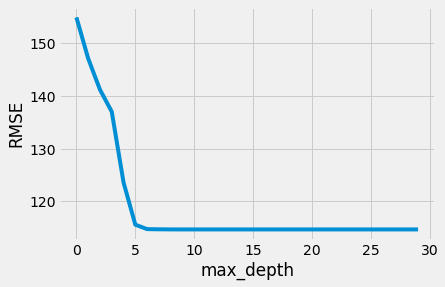

In [14]:
# Celda 5

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeRegressor
import math
rmse_scores=[]
for depth in range(30):
  reg= DecisionTreeRegressor(max_depth=depth+1,random_state=101)
  mse=-cross_val_score(reg, X,y, cv=10, scoring='neg_mean_squared_error').mean()
  rmse_scores.append(np.sqrt(mse))
index_min= np.argmin(rmse_scores)
min_rmse= np.min(rmse_scores)
print(f'MSE Minimo {min_rmse} Profundidad={index_min+1}')

# Obteniendo la evaluacion del desempeno de este arbol final con 10 niveles de profundida
reg= DecisionTreeRegressor(max_depth=index_min+1,random_state=101)
reg.fit(X,y)
mse=-cross_val_score(reg, X, y, cv=10,scoring='neg_mean_squared_error')
rmse= np.sqrt(mse)

print(f'Media RMSE:{rmse.mean()}')
print(f'Desviación Standar RMSE:{rmse.std()}')
df =pd.DataFrame(index=X.columns,data= reg.feature_importances_, columns=["Importancia"]).sort_values("Importancia")
#print(df)

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(range(30), rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()



## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [15]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [16]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [17]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [19]:
# Celda 6

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Árbol de decisión
#max_depth
max_depth_range = range(1, 21)

accuracy_scores = []


for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

# Mejor accuracy
best_tree_params=sorted(zip(accuracy_scores, max_depth_range))[::-1][0]
best_tree_depth=best_tree_params[1]

best_tree= DecisionTreeClassifier(max_depth=best_tree_depth,random_state=101)
best_tree.fit(X_train,y_train)
y_predict_tree= best_tree.predict(X_test)

print(" ")
print('\033[1m' +"Resultados"+ '\033[0m')
print(" ")
print(f'Árbol de Decisión:{round(f1_score(y_test , y_predict_tree),3)}')
print(f'Accuracy:{round(accuracy_score(y_test , y_predict_tree),3)}')


# Regresión Logística
#====================================================================================================
log_regression= LogisticRegression()
log_regression.fit(X_train,y_train)
y_predict_reg= log_regression.predict(X_test)

print(" ")
print('\033[1m' +"Resultados del modelo de Regresión Logística"+ '\033[0m')
print(" ")
print(f'Regresión Logística:{round(f1_score(y_test , y_predict_reg),3)}')
print(f'Accuracy Regresión Logística:{round(accuracy_score(y_test , y_predict_reg),3)}')


 
Resultados
 
Árbol de Decisión:0.645
Accuracy:0.645
 
Resultados del modelo de Regresión Logística
 
Regresión Logística:0.611
Accuracy Regresión Logística:0.615


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [21]:
# Celda 7


import sklearn.metrics as metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor


# 1 Votación mayoritaria, 300 muestras, bagged para 100 árboles de decisión, max depth = None
clf_VM1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_VM1.fit(X_train, y_train)
y_pred_VM1 = clf_VM1.predict(X_test)
resultado_1=metrics.f1_score(y_pred_VM1,y_test ), metrics.accuracy_score(y_pred_VM1, y_test)
print('1: [f1 , Accuracy] = '+str(resultado_1))

# 2 Votación mayoritaria, 300 muestras, bagged para 100 árboles de decisión, max depth = 2
clf_VM2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_VM2.fit(X_train, y_train)
y_pred_VM2 = clf_VM2.predict(X_test)
resultado_2=metrics.f1_score(y_pred_VM2,y_test), metrics.accuracy_score(y_pred_VM2, y_test)
print('2: [f1 , Accuracy] = '+str(resultado_2))


# 3 Votación mayoritaria, 300 muestras, bagged para 100 regresiones logísticas
clf_LR = BaggingClassifier(base_estimator=LogisticRegression(),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_LR.fit(X_train, y_train)
y_pred_LR = clf_LR.predict(X_test)
resultado_3=metrics.f1_score(y_pred_LR,y_test), metrics.accuracy_score(y_pred_LR, y_test)
print('3: [f1 , Accuracy] = '+str(resultado_3))


1: [f1 , Accuracy] = (0.6567567567567568, 0.6613333333333333)
2: [f1 , Accuracy] = (0.631578947368421, 0.6453333333333333)
3: [f1 , Accuracy] = (0.6134055517941774, 0.6193333333333333)


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [23]:
# Celda 8

# 1 Votación Ponderada, 300 muestras bagged, 100 árboles de decisión, max depth = None
clf_VM1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)


clf_VM1.fit(X_train, y_train)
y_pred_VM1 = clf_VM1.predict(X_test)
resultado_1=metrics.f1_score(y_pred_VM1,y_test ), metrics.accuracy_score(y_pred_VM1, y_test)
print('1 Votación Mayoritaria: [f1 , Accuracy] = '+str(resultado_1))

errors = np.zeros(clf_VM1.n_estimators)
y_pred_all_VM1 = np.zeros((X_test.shape[0], clf_VM1.n_estimators))

for i in range(clf_VM1.n_estimators):
    oob_sample_VM1 = ~clf_VM1.estimators_samples_[i]
    y_pred_VM1 = clf_VM1.estimators_[i].predict(X_train.values[oob_sample_VM1])
    errors[i] = metrics.accuracy_score(y_pred_VM1, y_train.values[oob_sample_VM1])
    y_pred_all_VM1[:, i] = clf_VM1.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_1 = (np.sum(y_pred_all_VM1 * alpha, axis=1) >= 0.5).astype(np.int)


resultado_1_1=metrics.f1_score(y_pred_1, y_test), metrics.accuracy_score(y_pred_1, y_test)
print('1 Votación Ponderada: [f1 , Accuracy] = '+str(resultado_1_1))

# 2 Votación Ponderada, 300 muestras bagged, 100 árboles de decisión, max depth = 2
clf_VM2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_VM2.fit(X_train, y_train)
y_pred_VM2 = clf_VM2.predict(X_test)
resultado_2=metrics.f1_score(y_pred_VM2,y_test), metrics.accuracy_score(y_pred_VM2, y_test)
print('2 Votación Mayoritaria: [f1 , Accuracy] = '+str(resultado_2))


errors = np.zeros(clf_VM2.n_estimators)
y_pred_all_VM2 = np.zeros((X_test.shape[0], clf_VM2.n_estimators))

for i in range(clf_VM2.n_estimators):
    oob_sample_VM2 = ~clf_VM2.estimators_samples_[i]
    y_pred_VM2 = clf_VM2.estimators_[i].predict(X_train.values[oob_sample_VM2])
    errors[i] = metrics.accuracy_score(y_pred_VM2, y_train.values[oob_sample_VM2])
    y_pred_all_VM2[:, i] = clf_VM2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_2 = (np.sum(y_pred_all_VM2 * alpha, axis=1) >= 0.5).astype(np.int)


resultado_2_1=metrics.f1_score(y_pred_2, y_test), metrics.accuracy_score(y_pred_2, y_test)
print('2 Votación Ponderada: [f1 , Accuracy] = '+str(resultado_2_1))


# 3 Votación Ponderada, 300 muestras bagged, 100 regresiones logísticas

clf_LR = BaggingClassifier(base_estimator=LogisticRegression(),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_LR.fit(X_train, y_train)
y_pred_LR = clf_LR.predict(X_test)
resultado_3=metrics.f1_score(y_pred_LR,y_test), metrics.accuracy_score(y_pred_LR, y_test)
print('3:Votación Mayoritaria [f1 , Accuracy] = '+str(resultado_3))

errors = np.zeros(clf_VM2.n_estimators)
y_pred_all_LR = np.zeros((X_test.shape[0], clf_VM2.n_estimators))

for i in range(clf_LR.n_estimators):
    oob_sample_LR = ~clf_LR.estimators_samples_[i]
    y_pred_LR = clf_LR.estimators_[i].predict(X_train.values[oob_sample_LR])
    errors[i] = metrics.accuracy_score(y_pred_LR, y_train.values[oob_sample_LR])
    y_pred_all_LR[:, i] = clf_LR.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_LR = (np.sum(y_pred_all_LR * alpha, axis=1) >= 0.5).astype(np.int)


resultado_LR=metrics.f1_score(y_pred_LR, y_test), metrics.accuracy_score(y_pred_LR, y_test)
print('3 Votación Ponderada: [f1 , Accuracy] = '+str(resultado_LR))


1 Votación Mayoritaria: [f1 , Accuracy] = (0.6567567567567568, 0.6613333333333333)
1 Votación Ponderada: [f1 , Accuracy] = (0.6631087391594397, 0.6633333333333333)
2 Votación Mayoritaria: [f1 , Accuracy] = (0.631578947368421, 0.6453333333333333)
2 Votación Ponderada: [f1 , Accuracy] = (0.6324549237170597, 0.6466666666666666)
3:Votación Mayoritaria [f1 , Accuracy] = (0.6134055517941774, 0.6193333333333333)
3 Votación Ponderada: [f1 , Accuracy] = (0.6167341430499326, 0.6213333333333333)


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9

Los modelos se comportan muy similar en ambos escenarios, adicional el grado de dispersion de los errores es constante, por lo cual la penalizacion en las dospenalizaciones coinciden.

La regresion logistica es la de menor desempeno en ambos escenarios